In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#shareable links to get data file IDs
#validation: https://drive.google.com/open?id=1s-fO9x5CpcDqeiaHu39z-SSnLOVWURH7
#training: https://drive.google.com/open?id=1IFjVHO7jrK1NUjfqJkYgQ354bMXQWsRm

fileId = drive.CreateFile({'id': '1IFjVHO7jrK1NUjfqJkYgQ354bMXQWsRm'}) 
#DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])
fileId.GetContentFile('training.zip')  # Save Drive file as a local file

fileId = drive.CreateFile({'id': '1s-fO9x5CpcDqeiaHu39z-SSnLOVWURH7'}) 
print(fileId['title'])
fileId.GetContentFile('validation.zip')

training.zip
validation.zip


In [0]:
!unzip training.zip -d ./
!unzip validation.zip -d ./

Archive:  training.zip
replace ./training/airplane/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  validation.zip
replace ./validation/airplane/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


(1111, 1111, 3)


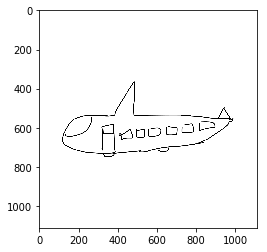

In [0]:
import cv2
import matplotlib.pylab as plt
img = cv2.imread('./training/airplane/71.png')
print(img.shape)
plt.imshow(img);

In [0]:
import os
from pathlib import Path
training_data =Path('./training/')
validation_data =Path('./validation/')

#print(sorted(os.listdir(training_data)))
print(len(os.listdir(training_data)))
labels_name = sorted(os.listdir(training_data))
print(labels_name)


250
['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with stem', 'flying bird', 'flying saucer', 'foot', 'fork', 'frog', 'frying-pan'

In [0]:
labels_num = []
i=1

for i in range(0,250):
  labels_num.append(i)
  
print(labels_num)
  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [0]:
labels_dict = dict( zip(labels_name,labels_num))
print(labels_dict)

{'airplane': 0, 'alarm clock': 1, 'angel': 2, 'ant': 3, 'apple': 4, 'arm': 5, 'armchair': 6, 'ashtray': 7, 'axe': 8, 'backpack': 9, 'banana': 10, 'barn': 11, 'baseball bat': 12, 'basket': 13, 'bathtub': 14, 'bear (animal)': 15, 'bed': 16, 'bee': 17, 'beer-mug': 18, 'bell': 19, 'bench': 20, 'bicycle': 21, 'binoculars': 22, 'blimp': 23, 'book': 24, 'bookshelf': 25, 'boomerang': 26, 'bottle opener': 27, 'bowl': 28, 'brain': 29, 'bread': 30, 'bridge': 31, 'bulldozer': 32, 'bus': 33, 'bush': 34, 'butterfly': 35, 'cabinet': 36, 'cactus': 37, 'cake': 38, 'calculator': 39, 'camel': 40, 'camera': 41, 'candle': 42, 'cannon': 43, 'canoe': 44, 'car (sedan)': 45, 'carrot': 46, 'castle': 47, 'cat': 48, 'cell phone': 49, 'chair': 50, 'chandelier': 51, 'church': 52, 'cigarette': 53, 'cloud': 54, 'comb': 55, 'computer monitor': 56, 'computer-mouse': 57, 'couch': 58, 'cow': 59, 'crab': 60, 'crane (machine)': 61, 'crocodile': 62, 'crown': 63, 'cup': 64, 'diamond': 65, 'dog': 66, 'dolphin': 67, 'donut': 6

In [0]:
import os
import cv2
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser

from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras import backend as K
import tensorflow as tf

color = sns.color_palette()
%matplotlib inline
%config InlineBackend.figure_format="png"

# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

seed=1234

# Set the numpy seed
np.random.seed(seed)

# Set the random seed in tensorflow at graph level
tf.set_random_seed(seed)

# Make the augmentation sequence deterministic
aug.seed(seed)


# Creating a dataframe for the training dataset
train_df = []
for folder in os.listdir(training_data):
    # Define the path to the images
    imgs_path = training_data / folder
    
    # Get the list of all the images stored in that directory
    imgs = sorted(imgs_path.glob('*.png'))
    
    # Store each image path and corresponding label 
    for img_name in imgs:
        train_df.append((str(img_name), labels_dict[folder]))


train_df = pd.DataFrame(train_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

####################################################################################################

# Creating dataframe for validation data in a similar fashion
valid_df = []
for folder in os.listdir(validation_data):
    imgs_path = validation_data / folder
    imgs = sorted(imgs_path.glob('*.png'))
    for img_name in imgs:
        valid_df.append((str(img_name), labels_dict[folder]))

        
valid_df = pd.DataFrame(valid_df, columns=['image', 'label'], index=None)
# shuffle the dataset 
valid_df = valid_df.sample(frac=1.).reset_index(drop=True)

####################################################################################################

# How many samples do we have in our training and validation data?
print("Number of traininng samples: ", len(train_df))
print("Number of validation samples: ", len(valid_df))

# sneak peek of the training and validation dataframes
print("\n",train_df.head(), "\n")
print("=================================================================\n")
print("\n", valid_df.head())

Using TensorFlow backend.


Number of traininng samples:  15000
Number of validation samples:  5000

                          image  label
0   training/pretzel/13113.png    163
1       training/bowl/2293.png     28
2        training/bus/2702.png     33
3  training/windmill/19620.png    245
4    training/armchair/493.png      6 



                               image  label
0        validation/spoon/16147.png    201
1     validation/crocodile/4967.png     62
2  validation/wrist-watch/19911.png    248
3      validation/elephant/5947.png     74
4         validation/horse/8483.png    106


In [0]:

# some constants(not truly though!) 

# dimensions to consider for the images
img_rows, img_cols, img_channels = 250,250,3

# batch size for training  
batch_size=16

# total number of classes in the dataset
nb_classes=250

In [0]:
# Augmentation sequence 
seq = iaa.OneOf([
   iaa.Fliplr(), # horizontal flips
   iaa.Affine(rotate=20), # roatation
   iaa.Multiply((1.2, 1.5))]) #random brightness

In [0]:
n = len(train_df)
nb_batches = int(np.ceil(n/16))

    # Get a numpy array of all the indices of the input data
indices = np.arange(n)
    
    # Define two numpy arrays for containing batch data and labels
batch_data = np.zeros((16, img_rows, img_cols, img_channels), dtype=np.float32)
batch_labels = np.zeros((16, nb_classes), dtype=np.float32)

In [0]:
# print(batch_labels)
# print(batch_data)
print(batch_labels.shape)
print(batch_data.shape)
print(indices)

(16, 250)
(16, 250, 250, 3)
[    0     1     2 ... 14997 14998 14999]


In [0]:
print(batch_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
nb_batches = int(np.ceil(n/batch_size))

for i in range(nb_batches):
            # get the next batch 
            next_batch_indices = indices[i*batch_size:(i+1)*batch_size]
print(next_batch_indices)

[14992 14993 14994 14995 14996 14997 14998 14999]


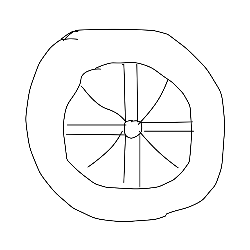

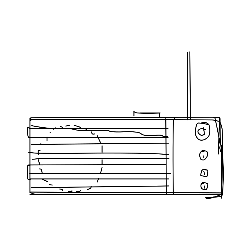

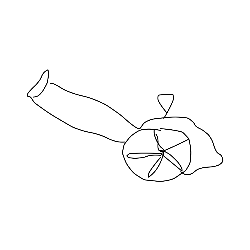

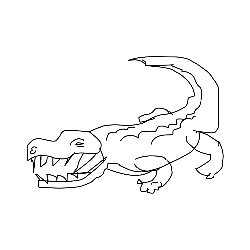

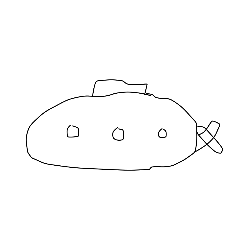

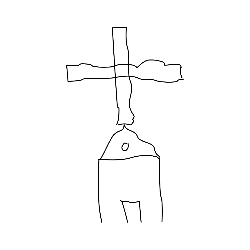

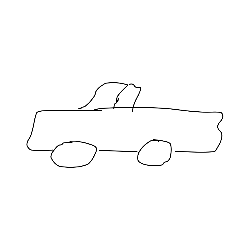

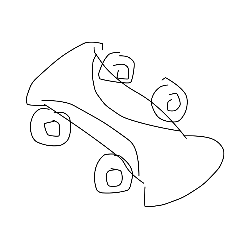

In [0]:
from google.colab.patches import cv2_imshow
for j, idx in enumerate(next_batch_indices):
  img = cv2.imread(train_df.iloc[idx]["image"])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = train_df.iloc[idx]["label"]
                
#   if not is_validation_data:
#      img = seq.augment_image(img)
                
  img = cv2.resize(img, (img_rows, img_cols)).astype(np.float32)
  cv2_imshow(img)
  batch_data[j] = img
# batch_labels[j] = to_categorical(label,num_classes=nb_classes)
  batch_labels[j] = to_categorical(label,num_classes=nb_classes)

In [0]:
for j, idx in enumerate(next_batch_indices):
  print(j)

0
1
2
3
4
5
6
7


In [0]:
def data_generator(data, batch_size, is_validation_data=False):
    # Get total number of samples in the data
    n = len(data)
    nb_batches = int(np.ceil(n/batch_size))

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, img_rows, img_cols, img_channels), dtype=np.float32)
    batch_labels = np.zeros((batch_size, nb_classes), dtype=np.float32)
    while True:
        if not is_validation_data:
            # shuffle indices for the training data
            np.random.shuffle(indices)
            
        for i in range(nb_batches):
            # get the next batch  
            next_batch_indices = indices[i*batch_size:(i+1)*batch_size]
            
            # process the next batch
            for j, idx in enumerate(next_batch_indices):
                img = cv2.imread(data.iloc[idx]["image"])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                label = data.iloc[idx]["label"]
                
                if not is_validation_data:
                    img = seq.augment_image(img)
                
                img = cv2.resize(img, (img_rows, img_cols)).astype(np.float32)
                batch_data[j] = img
                batch_labels[j] = to_categorical(label,num_classes=nb_classes)
                
            batch_data = preprocess_input(batch_data)
            yield batch_data, batch_labels

In [0]:
print(batch_data.shape) 
print(batch_labels.shape)

(16, 250, 250, 3)
(16, 250)


In [0]:
#training data generator 
train_data_gen = data_generator(train_df, batch_size, is_validation_data=False)

# validation data generator 
valid_data_gen = data_generator(valid_df, batch_size, is_validation_data=True)

In [0]:
import keras
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import merge
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
# number of epochs 
epochs=200

input_shape = Input(shape=(img_rows, img_cols, 3))

L1_conv = Conv2D(64, (15, 15), strides=(3, 3),  activation='relu')(input_shape)
L1_pool = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(L1_conv)

L2_conv = Conv2D(128, (5, 5), strides=(1, 1), activation='relu')(L1_pool)
L2_pool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(L2_conv)

L3_conv = Conv2D(256, (5, 5), strides=(1, 1), activation='relu')(L2_pool)
L3_pool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(L3_conv)

# Tower A
TowerA_conv1 = Conv2D(48, (1, 1))(L3_pool)
TowerA_conv2 = Conv2D(64, (3, 3))(TowerA_conv1)
TowerA_conv3 = Conv2D(128, (1, 1))(TowerA_conv2)

# Tower B
TowerB_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(L3_pool)
TowerB_conv1 = Conv2D(64, (1, 1))(TowerB_pool)
TowerB_conv2 = Conv2D(128, (1, 1))(TowerB_conv1)

# Tower C
TowerC_conv1 = Conv2D(64, (3, 3))(L3_pool)
TowerC_conv2 = Conv2D(128, (1, 1))(TowerC_conv1)

# Merge Towers
L_merged = keras.layers.concatenate([TowerA_conv3, TowerB_conv2, TowerC_conv2], axis=-1)

L5_pool = MaxPooling2D(pool_size=(3, 3),strides=(2, 2))(L_merged)

L6_conv = Conv2D(256, (1, 1), strides=(1, 1), activation='relu')(L5_pool)

L_flat = Flatten()(L6_conv)
L6_fullC1 = Dense(256, activation='relu')(L_flat)
L_dr = Dropout(0.5)(L6_fullC1)
L7_fullC2 = Dense(nb_classes, activation='softmax')(L_dr)
model = Model(input_shape, L7_fullC2)


lrate = 0.00001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 250, 250, 3)  0                                            
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 79, 79, 64)   43264       input_11[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_41 (MaxPooling2D) (None, 39, 39, 64)   0           conv2d_111[0][0]                 
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 35, 35, 128)  204928      max_pooling2d_41[0][0]           
__________________________________________________________________________________________________
max_poolin

In [0]:
# always user earlystopping
# the restore_best_weights parameter load the weights of the best iteration once the training finishes
#es = EarlyStopping(patience=10, restore_best_weights=True)

# checkpoint to save model
#chkpt = ModelCheckpoint(filepath="model1", save_best_only=True)
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

#callbacks = [EarlyStopping(monitor = 'val_acc', patience=30),
#            ModelCheckpoint(filepath = 'bestModel.h5', monitor ='val_acc', save_best_only=True)]

# number of training and validation steps for training and validation
#nb_train_steps = int(np.ceil(len(train_df)/batch_size))
#print(nb_train_steps)
#nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))
#print(nb_valid_steps)

In [0]:
# always user earlystopping
# the restore_best_weights parameter load the weights of the best iteration once the training finishes
es = EarlyStopping(patience=10, restore_best_weights=True)

# checkpoint to save model
chkpt = ModelCheckpoint(filepath="models\model1", save_best_only=True)

# number of training and validation steps for training and validation
nb_train_steps = int(np.ceil(len(train_df)/batch_size))
nb_valid_steps = int(np.ceil(len(valid_df)/batch_size))

# number of epochs 
nb_epochs=100

In [0]:
print(train_data_gen)
print(nb_epochs)
print(nb_train_steps)
print(valid_data_gen)
print(nb_valid_steps)

<generator object data_generator at 0x7fd17bc895c8>
100
938
<generator object data_generator at 0x7fd17bc89308>
313


In [0]:
# train the model 
history1 = model.fit_generator(train_data_gen, 
                              epochs=nb_epochs, 
                              steps_per_epoch=nb_train_steps, 
                              validation_data=valid_data_gen, 
                              validation_steps=nb_valid_steps,
                              callbacks=[es,chkpt])

Epoch 1/100
938/938 [==============================] - 260s 278ms/step - loss: 6.1241 - acc: 0.0041 - val_loss: 5.5388 - val_acc: 0.0040
Epoch 2/100
938/938 [==============================] - 251s 267ms/step - loss: 5.5663 - acc: 0.0042 - val_loss: 5.5302 - val_acc: 0.0040
Epoch 3/100
938/938 [==============================] - 250s 266ms/step - loss: 5.5480 - acc: 0.0040 - val_loss: 5.5255 - val_acc: 0.0024
Epoch 4/100
938/938 [==============================] - 249s 266ms/step - loss: 5.5375 - acc: 0.0038 - val_loss: 5.5227 - val_acc: 0.0034
Epoch 5/100
938/938 [==============================] - 249s 265ms/step - loss: 5.5279 - acc: 0.0049 - val_loss: 5.5241 - val_acc: 0.0042
Epoch 6/100
938/938 [==============================] - 247s 264ms/step - loss: 5.5257 - acc: 0.0046 - val_loss: 5.5154 - val_acc: 0.0046
Epoch 7/100
938/938 [==============================] - 245s 261ms/step - loss: 5.5197 - acc: 0.0053 - val_loss: 5.5133 - val_acc: 0.0048
Epoch 8/100
419/938 [============>.......

KeyboardInterrupt: ignored